In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
df1=pd.read_csv("COVID_19_US.csv",parse_dates=["Last_Update"])

In [265]:
df1.shape

(58, 18)

In [266]:
df1.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [267]:
df1.keys()

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [268]:
df1.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [269]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

In [270]:
df1.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

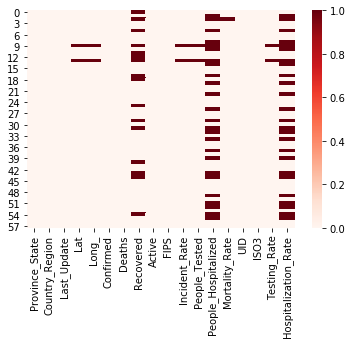

<Figure size 1440x1440 with 0 Axes>

In [271]:
sns.heatmap(df1.isnull(),cmap="Reds")
plt.figure(figsize=(20,20))
plt.show()

I am seperating categorical and numerical variables for better visualisation

In [272]:
cat_col=["Province_State","Country_Region","Last_Update","ISO3"]
num_col = [c for c in df1.columns if c not in cat_col]
print(num_col)

['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate']


Now we can got for better decriptive statistics

In [273]:
df1[num_col].describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [274]:
df1[cat_col].describe()

,Province_State,Country_Region,Last_Update,ISO3
count,58,58,58,58
unique,58,1,1,6
top,New Hampshire,US,2020-05-21 02:32:54,USA
freq,1,58,58,53
first,NaN,NaN,2020-05-21 02:32:54,NaN
last,NaN,NaN,2020-05-21 02:32:54,NaN


Observations: Preliminary we found that

1)Shape of data is 58,18

2) where we have 4 categorical columns

3)There are many null values and Zero as a value present in the dataset( Recovered=16,People_Hospitalized=25,Hospitalization_Rate=25,Mortality_Rate=1)but we wont be able to remove them as of now as we have already have a very small dataset. lets see if we could replace them with some values

4) outliers are also present

5)Also data is not normally distributed

# Visualization of data

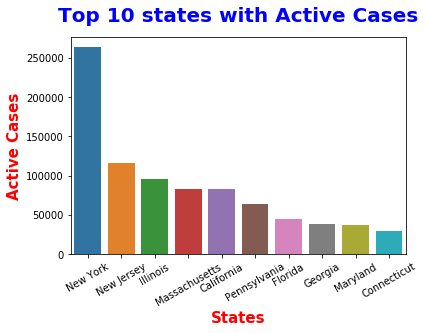

In [275]:
sns.barplot(x=df1.nlargest(10,"Active")["Province_State"],y=df1.nlargest(10,"Active")["Active"])
plt.xticks(rotation=30)
plt.title("Top 10 states with Active Cases",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("Active Cases",{"size":15,"color":"red"},weight="bold")
plt.xlabel("States",{"size":15,"color":"red"},weight="bold")
plt.show()

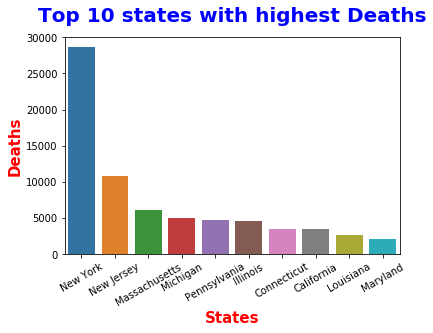

In [276]:
sns.barplot(x=df1.nlargest(10,"Deaths")["Province_State"],y=df1.nlargest(10,"Deaths")["Deaths"])
plt.xticks(rotation=30)
plt.title("Top 10 states with highest Deaths",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("Deaths",{"size":15,"color":"red"},weight="bold")
plt.xlabel("States",{"size":15,"color":"red"},weight="bold")
plt.show()

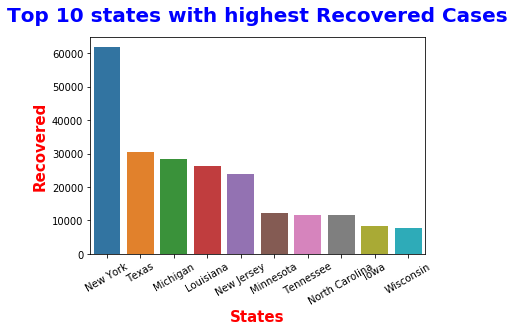

In [277]:
sns.barplot(x=df1.nlargest(10,"Recovered")["Province_State"],y=df1.nlargest(10,"Recovered")["Recovered"])
plt.xticks(rotation=30)
plt.title("Top 10 states with highest Recovered Cases",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("Recovered",{"size":15,"color":"red"},weight="bold")
plt.xlabel("States",{"size":15,"color":"red"},weight="bold")
plt.show()

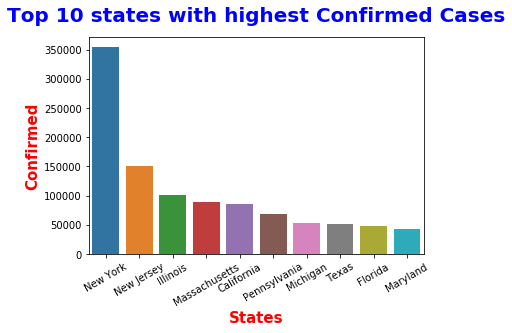

In [278]:
sns.barplot(x=df1.nlargest(10,"Confirmed")["Province_State"],y=df1.nlargest(10,"Confirmed")["Confirmed"])
plt.xticks(rotation=30)
plt.title("Top 10 states with highest Confirmed Cases",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("Confirmed",{"size":15,"color":"red"},weight="bold")
plt.xlabel("States",{"size":15,"color":"red"},weight="bold")
plt.show()

Seems we have Nan values in Recoverd cases so I have inserted one more coloumn and calculated approx. recovered cases for the states where NAN was present. Calculation done basis average recovery rate of US calculated as below

In [279]:
reco_rate=df1["Recovered"].sum()/df1["Confirmed"].sum()
reco_rate

0.18965198378970174

In [280]:
df1["Revised_Recovery"]=df1["Recovered"]
df1["Revised_Recovery"].replace(np.nan,df1["Confirmed"]*reco_rate,inplace=True)
df1["Revised_Recovery"].isnull().sum()

0

In [281]:
df1["Revised_Recovery"]=df1["Revised_Recovery"].round(decimals=1)
df1.nlargest(10,["People_Tested","Confirmed","Active","Deaths","Recovered","Revised_Recovery"])[["Province_State","People_Tested","Confirmed","Active","Deaths","Recovered","Revised_Recovery"]]

,Province_State,People_Tested,Confirmed,Active,Deaths,Recovered,Revised_Recovery
36,New York,1505836.0,354370,263848.0,28636,61886.0,61886.0
5,California,1380120.0,85997,82500.0,3497,NaN,16309.5
11,Florida,771348.0,47471,45375.0,2096,NaN,9003.0
49,Texas,770241.0,51673,19906.0,1426,30341.0,30341.0
17,Illinois,642713.0,100418,95893.0,4525,NaN,19044.5
34,New Jersey,531343.0,150776,116082.0,10749,23945.0,23945.0
25,Massachusetts,489953.0,88970,82904.0,6066,NaN,16873.3
26,Michigan,437072.0,53009,19715.0,5060,28234.0,28234.0
12,Georgia,402940.0,39801,38104.0,1697,NaN,7548.3
48,Tennessee,354013.0,18412,6324.0,305,11783.0,11783.0


In [282]:
df1.nsmallest(10,["People_Tested","Confirmed","Active","Deaths","Recovered","Revised_Recovery"])[["Province_State","People_Tested","Confirmed","Active","Deaths","Recovered","Revised_Recovery"]]

,Province_State,People_Tested,Confirmed,Active,Deaths,Recovered,Revised_Recovery
2,American Samoa,124.0,0,0.0,0,NaN,0.0
52,Virgin Islands,1383.0,69,2.0,6,61.0,61.0
44,Puerto Rico,2866.0,2866,2741.0,125,NaN,543.5
39,Northern Mariana Islands,3817.0,21,6.0,2,13.0,13.0
14,Guam,4972.0,154,24.0,5,125.0,125.0
57,Wyoming,18840.0,787,248.0,11,528.0,528.0
51,Vermont,25058.0,944,66.0,54,824.0,824.0
30,Montana,29726.0,478,22.0,16,440.0,440.0
47,South Dakota,30389.0,4177,1108.0,46,3023.0,3023.0
1,Alaska,37045.0,401,39.0,10,352.0,352.0


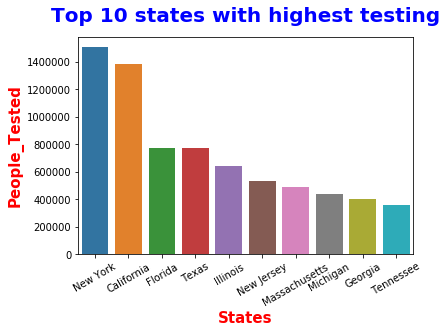

In [283]:
sns.barplot(x=df1.nlargest(10,"People_Tested")["Province_State"],y=df1.nlargest(10,"People_Tested")["People_Tested"])
plt.xticks(rotation=30)
plt.title("Top 10 states with highest testing",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("People_Tested",{"size":15,"color":"red"},weight="bold")
plt.xlabel("States",{"size":15,"color":"red"},weight="bold")
plt.show()

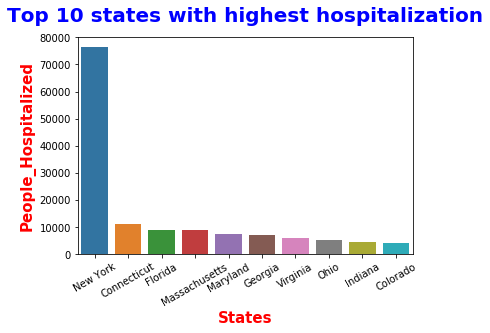

In [284]:
sns.barplot(x=df1.nlargest(10,"People_Hospitalized")["Province_State"],y=df1.nlargest(10,"People_Hospitalized")["People_Hospitalized"])
plt.xticks(rotation=30)
plt.title("Top 10 states with highest hospitalization",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("People_Hospitalized",{"size":15,"color":"red"},weight="bold")
plt.xlabel("States",{"size":15,"color":"red"},weight="bold")
plt.show()

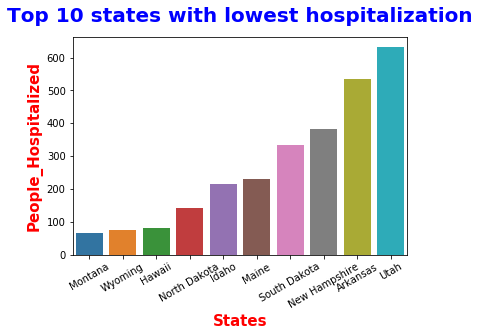

In [285]:
sns.barplot(x=df1.nsmallest(10,"People_Hospitalized")["Province_State"],y=df1.nsmallest(10,"People_Hospitalized")["People_Hospitalized"])
plt.xticks(rotation=30)
plt.title("Top 10 states with lowest hospitalization",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("People_Hospitalized",{"size":15,"color":"red"},weight="bold")
plt.xlabel("States",{"size":15,"color":"red"},weight="bold")
plt.show()

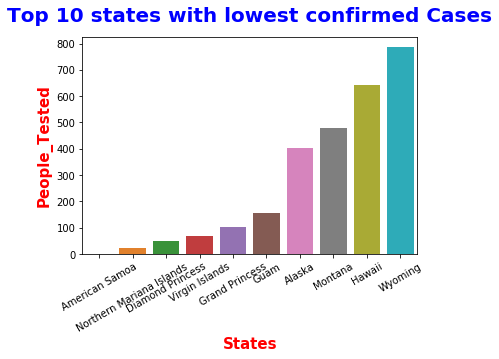

In [286]:
sns.barplot(x=df1.nsmallest(10,"Confirmed")["Province_State"],y=df1.nsmallest(10,"Confirmed")["Confirmed"])
plt.xticks(rotation=30)
plt.title("Top 10 states with lowest confirmed Cases",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("People_Tested",{"size":15,"color":"red"},weight="bold")
plt.xlabel("States",{"size":15,"color":"red"},weight="bold")
plt.show()

Observations: On State wise observing the data

1)Highest testing has happened in Newyork which result to highest confirmed cases , highest death rate,recovery and hospitalization

2) But if we go one level down we see california has done 2nd highest testing almost equal to Newyork but not that much confirmed cases also lower deaths. 

3)Lowest testing rate in American Samoa

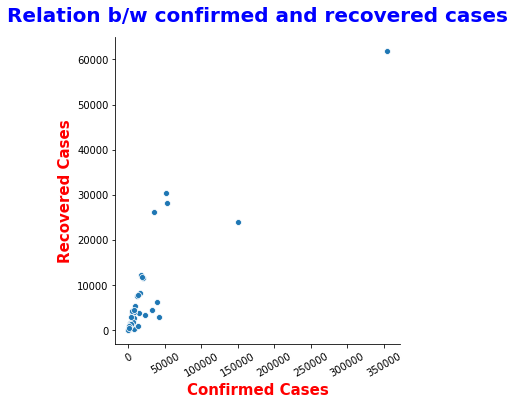

In [287]:
sns.relplot(x="Confirmed",y="Recovered",data=df1)
plt.xticks(rotation=30)
plt.title("Relation b/w confirmed and recovered cases",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("Recovered Cases",{"size":15,"color":"red"},weight="bold")
plt.xlabel("Confirmed Cases",{"size":15,"color":"red"},weight="bold")
plt.show()

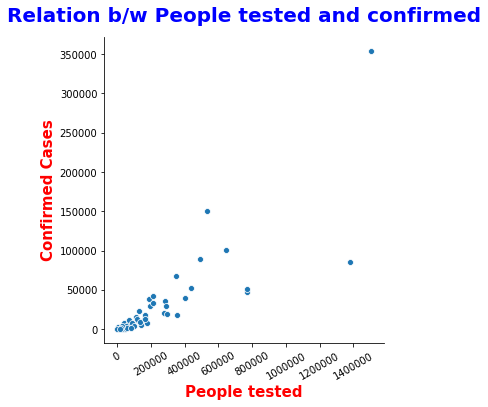

In [288]:
sns.relplot(x="People_Tested",y="Confirmed",data=df1)
plt.xticks(rotation=30)
plt.title("Relation b/w People tested and confirmed",{"size":20,"color":"blue"},pad=15,weight="bold")
plt.ylabel("Confirmed Cases",{"size":15,"color":"red"},weight="bold")
plt.xlabel("People tested",{"size":15,"color":"red"},weight="bold")
plt.show()

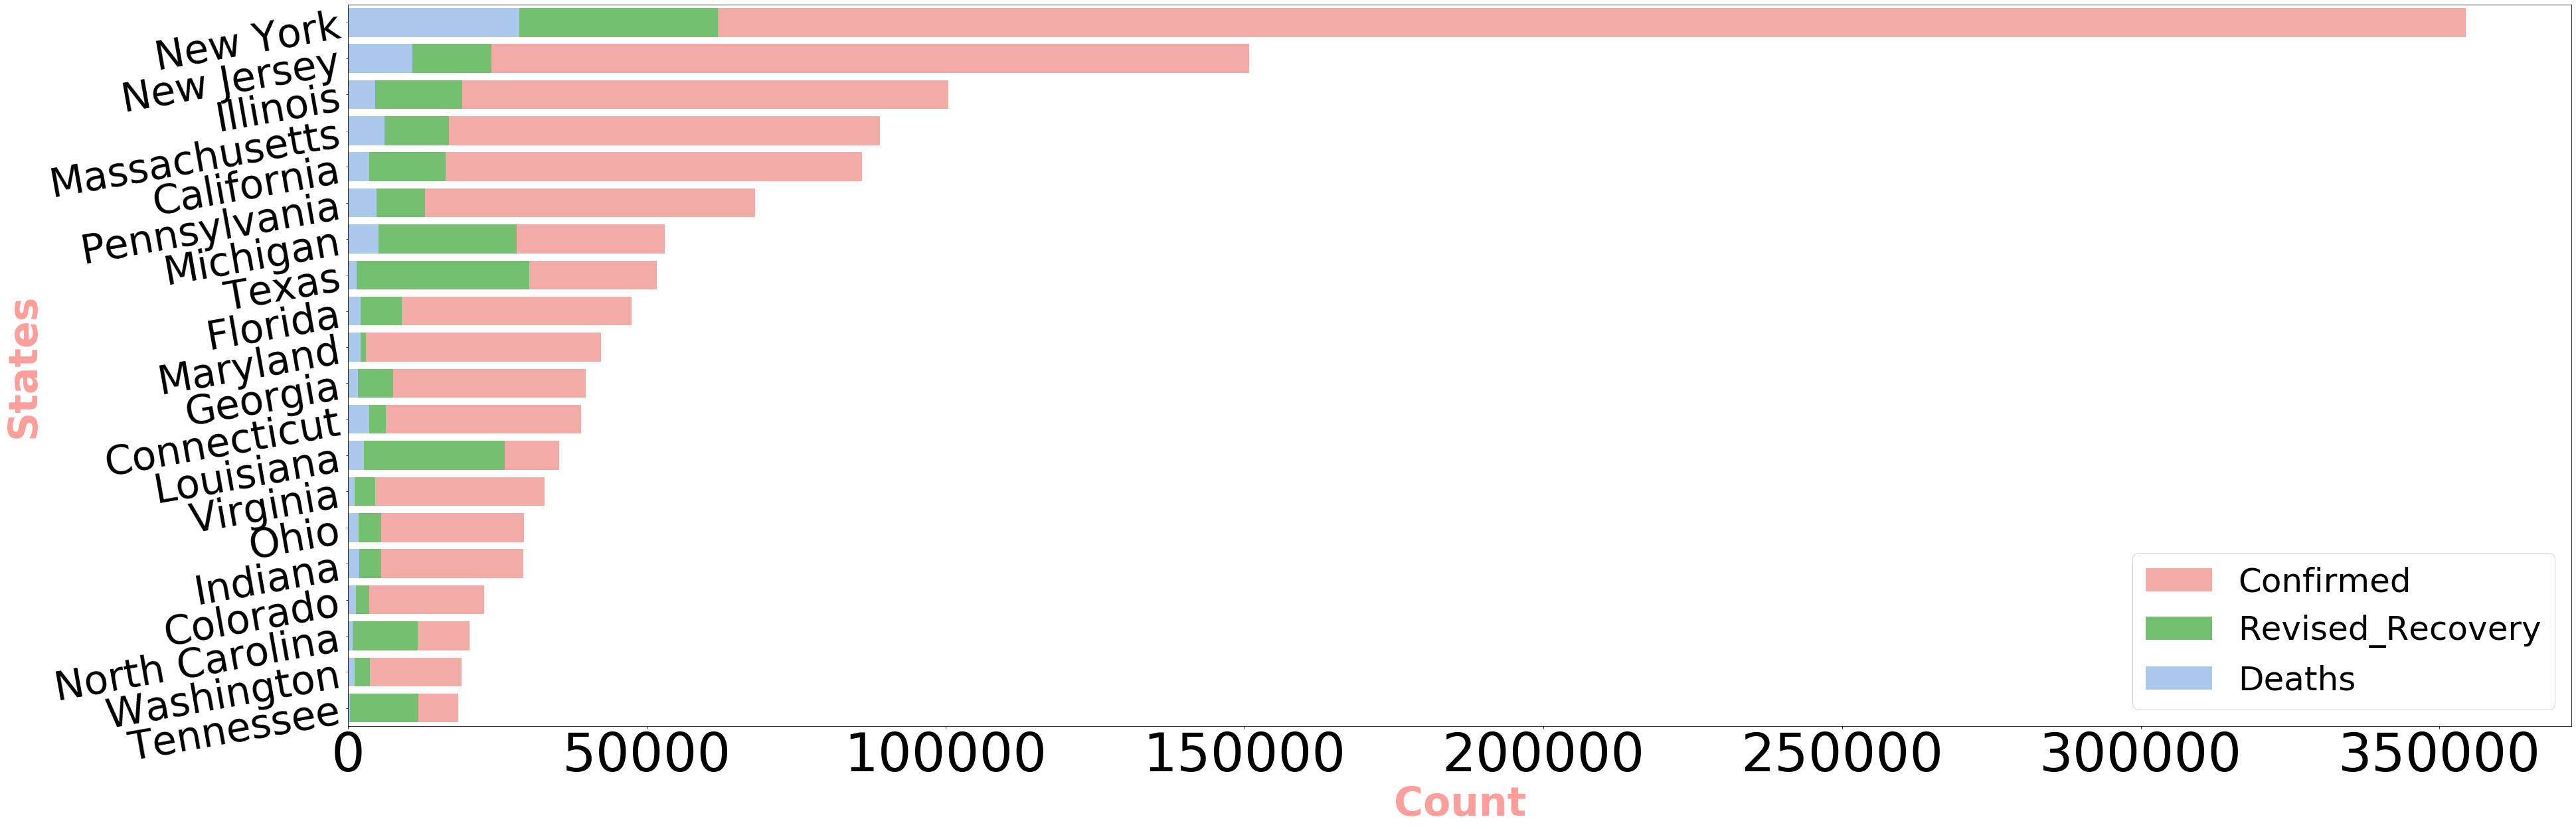

In [289]:
f, ax = plt.subplots(figsize=(60, 20))
data = df1.nlargest(20,["Confirmed","Revised_Recovery","Deaths"])[["Province_State","Confirmed","Revised_Recovery","Deaths"]]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province_State", data=data,label="Confirmed", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Revised_Recovery", y="Province_State", data=data, label="Revised_Recovery", color="g")
sns.set_color_codes("pastel")
sns.barplot(x="Deaths", y="Province_State", data=data, label="Deaths", color="b")
plt.xticks(fontsize=80)
plt.yticks(fontsize=60)
plt.yticks(rotation=10)
plt.legend(fontsize=50,loc="lower right")
plt.ylabel("States",fontsize=60,color="r",weight="bold")
plt.xlabel("Count",fontsize=60,color="r",weight="bold")
plt.show()

In [290]:
df2=df1.drop(columns=["Province_State","Country_Region","Last_Update","Lat","Long_","UID","ISO3","Recovered"])

In [291]:
df2.head(5)

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Revised_Recovery
0,13052,522,12530.0,1,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860,2475.3
1,401,10,39.0,2,54.815493,37045.0,NaN,2.493766,5063.940017,NaN,352.0
2,0,0,0.0,60,0.000000,124.0,NaN,NaN,222.857246,NaN,0.0
3,14906,747,10386.0,4,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005,3773.0
4,5003,107,1044.0,5,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584,3852.0


now replacing nan values in People_Hospitalized and Mortality_Rate, hospitalization_Rate

In [292]:
hosp_rate=df2["People_Hospitalized"].sum()/df2["Confirmed"].sum()
hosp_rate

0.10414388476228097

In [293]:
df2["Rev_People_Hospitalized"]=df2["People_Hospitalized"]
df2["Rev_People_Hospitalized"].replace(np.nan,df2["Confirmed"]*hosp_rate,inplace=True)
df2["Rev_People_Hospitalized"].isnull().sum()

0

In [294]:
mor_rate=df2["Deaths"].sum()*100/df2["Confirmed"].sum()
mor_rate

6.021124423511763

In [295]:
df2["Mortality_Rate"].replace(np.nan,0,inplace=True)
df2[df2["Mortality_Rate"].isnull()]

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Revised_Recovery,Rev_People_Hospitalized


In [296]:
df2.drop(columns="People_Hospitalized",inplace=True)


In [297]:
df2["Hospitalization_Rate"].replace(np.nan,6.0211,inplace=True)
df2.head(5)

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Revised_Recovery,Rev_People_Hospitalized
0,13052,522,12530.0,1,266.194321,164450.0,3.999387,3353.942386,11.438860,2475.3,1493.000000
1,401,10,39.0,2,54.815493,37045.0,2.493766,5063.940017,6.021100,352.0,41.761698
2,0,0,0.0,60,0.000000,124.0,0.000000,222.857246,6.021100,0.0,0.000000
3,14906,747,10386.0,4,204.788838,165435.0,5.011405,2272.859351,12.022005,3773.0,1792.000000
4,5003,107,1044.0,5,165.782801,96258.0,2.138717,3189.670370,10.693584,3852.0,535.000000


In [298]:
df2.corr()

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Revised_Recovery,Rev_People_Hospitalized
Confirmed,1.000000,0.982191,0.985218,-0.096696,0.711776,0.828022,0.386823,0.334032,0.201745,0.884285,0.958567
Deaths,0.982191,1.000000,0.954378,-0.075053,0.712117,0.741730,0.425715,0.345441,0.221921,0.859552,0.973091
Active,0.985218,0.954378,1.000000,-0.092276,0.703931,0.829687,0.371632,0.322773,0.205986,0.811682,0.931896
FIPS,-0.096696,-0.075053,-0.092276,1.000000,-0.220264,-0.194011,-0.246082,-0.092705,-0.160575,-0.124783,-0.073194
Incident_Rate,0.711776,0.712117,0.703931,-0.220264,1.000000,0.441669,0.392781,0.620621,0.131390,0.597170,0.637910
People_Tested,0.828022,0.741730,0.829687,-0.194011,0.441669,1.000000,0.249819,0.230753,0.131831,0.819525,0.745680
Mortality_Rate,0.386823,0.425715,0.371632,-0.246082,0.392781,0.249819,1.000000,0.231533,0.211604,0.380038,0.351365
Testing_Rate,0.334032,0.345441,0.322773,-0.092705,0.620621,0.230753,0.231533,1.000000,0.018899,0.297756,0.308827
Hospitalization_Rate,0.201745,0.221921,0.205986,-0.160575,0.131390,0.131831,0.211604,0.018899,1.000000,0.086682,0.322633
Revised_Recovery,0.884285,0.859552,0.811682,-0.124783,0.597170,0.819525,0.380038,0.297756,0.086682,1.000000,0.820440


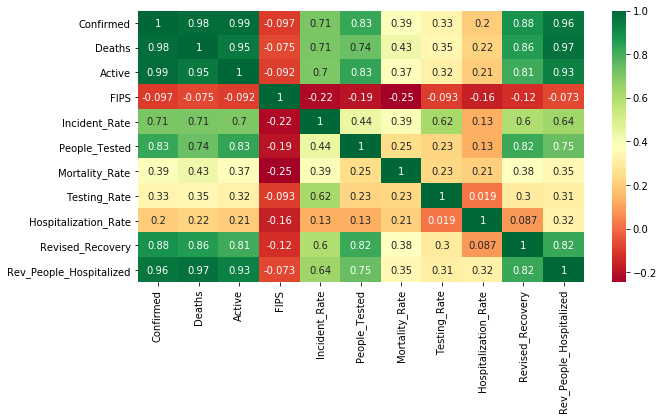

In [299]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),cmap="RdYlGn",annot=True)
plt.show()

In [300]:
df1.skew()

Lat                    -2.213092
Long_                   3.509241
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.136333
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.955650
People_Tested           2.783163
People_Hospitalized     5.290187
Mortality_Rate          0.492052
UID                    -3.027480
Testing_Rate            1.291806
Hospitalization_Rate    0.667943
Revised_Recovery        3.176374
dtype: float64

In [301]:
df2[df2["People_Tested"].isnull()]

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Revised_Recovery,Rev_People_Hospitalized
9,49,0,49.0,88888,NaN,NaN,0.000000,NaN,6.0211,9.3,5.10305
13,103,3,100.0,99999,NaN,NaN,2.912621,NaN,6.0211,19.5,10.72682


In [302]:
test_rate=df2["Confirmed"].sum()/df2["People_Tested"].sum()
test_rate


0.12269755248169423

In [303]:
df2["Testing_Rate"].replace(np.nan,0.12269,inplace=True)
df2.isnull().sum()

Confirmed                  0
Deaths                     0
Active                     0
FIPS                       0
Incident_Rate              2
People_Tested              2
Mortality_Rate             0
Testing_Rate               0
Hospitalization_Rate       0
Revised_Recovery           0
Rev_People_Hospitalized    0
dtype: int64

In [304]:
df2["People_Tested"].replace(np.nan,df2["Confirmed"]/test_rate,inplace=True)
df2["People_Tested"].isnull().sum()

0

In [305]:
df2.drop(columns="Incident_Rate",inplace=True)

In [306]:
x=df2.drop(columns="Deaths")
y=df2[["Deaths"]]


In [307]:
print(x.shape)
print(y.shape)


(58, 9)
(58, 1)


In [308]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x= scaler.fit_transform(x)

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
print(r2_scr)

0.9509939366518183


In [318]:
lr.score(x_test,y_test)

0.9509939366518183

Now taking recovered cases as target variable

In [328]:
x1=df2.drop(columns="Revised_Recovery")
y1=df2[["Revised_Recovery"]]


In [330]:
print(x1.shape)
print(y1.shape)


(58, 9)
(58, 1)


In [332]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=57)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1_train,y1_train)
y1_pred=lr.predict(x1_test)
r2_scr1=r2_score(y1_test,y1_pred)
print(r2_scr1)

0.9230024901201483


so saving the LinearRegressor model

In [334]:
from sklearn.externals import joblib
joblib.dump(lr,"covid19.pkl")

['covid19.pkl']

In [335]:
df=pd.DataFrame(y_pred)
df.to_csv("covid19_pred_submission.csv")